In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
with open('/Users/sagarkapri/Desktop/Level_Data/district.json', 'r') as file:
    data = json.loads(file.read())

DATA  EXPLORATION

In [4]:
print(type(data))
print(data.keys())

<class 'dict'>
dict_keys(['benchmarks', 'schools', 'courseSections', 'courseSectionRosters', 'scores'])


**Benchamark**

In [5]:
benchmarks_df = pd.DataFrame(data['benchmarks'])
print(benchmarks_df.shape)
print(benchmarks_df.dtypes)
benchmarks_df.head()

(42, 6)
id            object
districtId    object
year          object
level         object
dataSource    object
value         object
dtype: object


,id,districtId,year,level,dataSource,value
0,120,45,2017,3,value_scantronMath,2356
1,121,45,2017,3,value_scantronReading,2563
2,122,45,2017,4,value_scantronMath,2493
3,123,45,2017,4,value_scantronReading,2674
4,124,45,2017,5,value_scantronMath,2584


In [6]:
benchmarks_df['year'] = pd.to_numeric(benchmarks_df['year'], errors='coerce').astype('int64')
benchmarks_df['level'] = pd.to_numeric(benchmarks_df['level'], errors='coerce').astype('int64')
benchmarks_df['value'] = pd.to_numeric(benchmarks_df['value'], errors='coerce').astype('float64')

print(benchmarks_df.dtypes)

id             object
districtId     object
year            int64
level           int64
dataSource     object
value         float64
dtype: object


In [7]:
benchmarks_df.describe()

,year,level,value
count,42.000000,42.000000,42.000000
mean,2017.690476,6.285714,1955.752381
std,0.467901,2.520992,1178.295465
min,2017.000000,3.000000,17.000000
25%,2017.000000,4.000000,282.500000
50%,2018.000000,6.000000,2586.500000
75%,2018.000000,8.000000,2782.500000
max,2018.000000,11.000000,3063.000000


Check for missing values

In [8]:
print(benchmarks_df.isnull().sum())

id            0
districtId    0
year          0
level         0
dataSource    0
value         0
dtype: int64


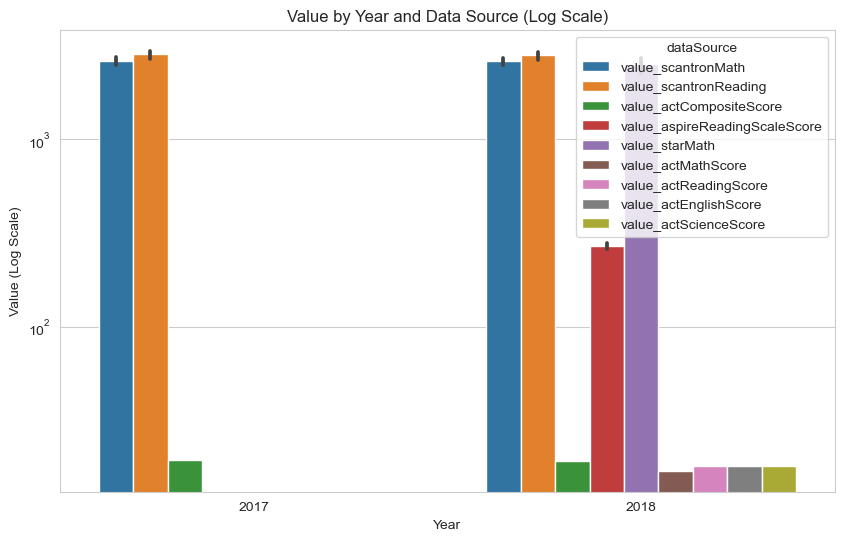

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='value', hue='dataSource', data=benchmarks_df)
plt.yscale('log')  # Apply log scale to the y-axis
plt.title("Value by Year and Data Source (Log Scale)")
plt.xlabel("Year")
plt.ylabel("Value (Log Scale)")
plt.show()

**School**

In [10]:
schools_df = pd.DataFrame(data['schools'])
print(schools_df.shape)
print(schools_df.dtypes)
schools_df.head()

(20, 8)
id                      object
name                    object
districtId              object
costCenter              object
abbreviation            object
acqRequestSelectable    object
oneRoster_sourcedId     object
oneRoster_ticketId      object
dtype: object


,id,name,districtId,costCenter,abbreviation,acqRequestSelectable,oneRoster_sourcedId,oneRoster_ticketId
0,222,Elementary A,45,5,EES,1,,0
1,223,Middle School A,45,8,EMS,1,,0
2,224,High School A,45,10,ECHS,1,,0
3,225,Junior High B,45,12,ECJH,1,,0
4,226,Elementary School B,45,18,HES,1,,0


**Course Sections**

In [11]:
courseSections_df = pd.DataFrame(data['courseSections'])
print(courseSections_df.shape)
print(courseSections_df.dtypes)
courseSections_df.head()

(17662, 4)
id          object
vanityId    object
year        object
schoolId    object
dtype: object


,id,vanityId,year,schoolId
0,40388,PE 4,2015,222
1,40389,READING 4,2015,222
2,40390,HmroomPK6,2015,222
3,40391,LANGUAGE 4,2015,222
4,40392,SCIENCE 4,2015,222


**Course Selection Rosters**

In [12]:
courseSectionRosters_df = pd.DataFrame(data['courseSectionRosters'])
print(courseSectionRosters_df.shape)
print(courseSectionRosters_df.dtypes)
courseSectionRosters_df.head()

(612241, 5)
id                 object
courseSectionId    object
studentId          object
studentLevel       object
ticket             object
dtype: object


,id,courseSectionId,studentId,studentLevel,ticket
0,1047696,39975,45333,4,
1,1047704,39975,56116,4,
2,1047706,39975,45345,4,
3,1047715,39975,45400,4,
4,1047729,39975,45413,4,


**Scores**

In [13]:
scores_df = pd.DataFrame(data['scores'])
print(scores_df.shape)
print(scores_df.dtypes)
scores_df.head()

(34317, 71)
id                      object
ticket                  object
studentId               object
studentLevel            object
year                    object
                         ...  
value_gcaInfo           object
value_gcaNar            object
value_gcaOpin           object
value_aimsWebMath       object
value_aimsWebReading    object
Length: 71, dtype: object


,id,ticket,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
0,115316,1530793427me3n202dz2,44774,8,2017,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120482,1530793766nnbvcr456s,44774,8,2017,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,394052,1561150944dlvii7ak6r,44774,9,2018,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,115317,1530793427me3n202dz2,44775,8,2017,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120483,1530793766nnbvcr456s,44775,8,2017,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
scores_df.describe()

,id,ticket,studentId,studentLevel,year,measurementTypeId,subgroup_specialEd,subgroup_lunchStatus,subgroup_gender,subgroup_ethnicity,...,value_starReading,value_starMath,value_ScienceMilestones,value_LEAPScience,value_SocialMilestones,value_gcaInfo,value_gcaNar,value_gcaOpin,value_aimsWebMath,value_aimsWebReading
count,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317,...,34317,34317,34317,34317,34317,34317,34317,34317,34317,34317
unique,34317,16,12211,17,3,3,2,2,1,1,...,1,1054,1,1,1,1,1,1,1,1
top,115316,drsccp8cnj,48102,7,2018,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,8104,6,4562,22842,17700,33449,25197,34317,34317,...,34317,24265,34317,34317,34317,34317,34317,34317,34317,34317
